# Guided Project: Finding the Best Markets to Advertise In

## Introduction

Assuming we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

## Understanding the Data

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run [a popular Medium publication](https://medium.freecodecamp.org/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [230]:
# Read in the dataset
import pandas as pd
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [231]:
survey.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

In [232]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking for Sample Representativity

For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

In [233]:
# Explore the JobRoleInterest column
survey["JobRoleInterest"].head()

0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
Name: JobRoleInterest, dtype: object

In [234]:
# Generate a frequency table

survey["JobRoleInterest"].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                11.770595
  Front-End Web Developer                                                                                                                                                                                                6.435927
  Data Scientist                                                                                                                                                                                                         2.173913
Back-End Web Developer                                                                                                                                                                                                   2.030892
  Mobile Developer                                                                              

From the analysis of the table, we notice that there are people interested in more than one roles/subjects. It'd be useful to generate a frequency table for each subject.

In [235]:
# Split each string in the 'JobRoleInterest' column
interests_no_nulls = survey['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

# Frequency table for the var describing the number of options
n_of_options = splitted_interests.apply(lambda x: len(x)) # x is a list of job options
print(n_of_options)
n_of_options.value_counts(normalize = True).sort_index() * 100

1         1
2         5
3         3
4         5
6         1
         ..
18161     1
18162     3
18163     4
18171    13
18174     3
Name: JobRoleInterest, Length: 6992, dtype: int64


1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

There are only 31% of people surveyed who know what job or role they're interested in, while a large number of students have mixed interests.

The focus of our courses is on web and mobile development, so let's find out how many people are interested in at least one of these two subjects.

In [236]:
web_or_mobile = interests_no_nulls.str.contains("Web Developer|Mobile Developer")
# Frequency table
frequency_table = web_or_mobile.value_counts(normalize=True)*100
print(frequency_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


Text(0, 0.5, 'Percentage')

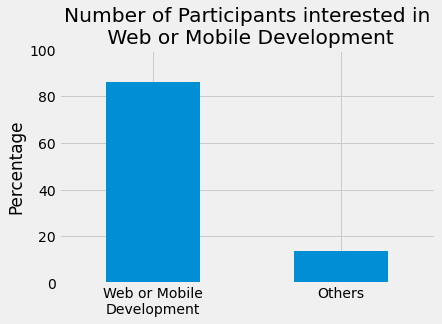

In [237]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
frequency_table.plot(kind='bar')
plt.xticks([0, 1], ['Web or Mobile\nDevelopment', 'Others'], rotation = 0)
plt.title("Number of Participants interested in\n Web or Mobile Development")
plt.ylim([0, 100])
plt.ylabel('Percentage')

From the graph, we can see that there are over 80% of respondents interested in web or mobile development, which means the sample is representative of the population we need. Next, we find out where these new coders are located, and what are the densities (how many coders there are) for each location.

## New Coders - Locations and Densities

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

In [238]:
interests_no_nulls

1                                 Full-Stack Web Developer
2          Front-End Web Developer, Back-End Web Develo...
3          Front-End Web Developer, Full-Stack Web Deve...
4        Full-Stack Web Developer, Information Security...
6                                 Full-Stack Web Developer
                               ...                        
18161                             Full-Stack Web Developer
18162      Data Scientist, Game Developer,   Quality As...
18163    Back-End Web Developer, Data Engineer,   Data ...
18171      DevOps / SysAdmin,   Mobile Developer,   Pro...
18174    Back-End Web Developer, Data Engineer,   Data ...
Name: JobRoleInterest, Length: 6992, dtype: object

In [239]:
# Drops rows where participants didn't answer what role they're interested in
df = survey.dropna(subset=["JobRoleInterest"])

# Alternative solution
df = survey[survey["JobRoleInterest"].notnull()].copy()

In [240]:
# Check if there is no null value
df["JobRoleInterest"].isnull().sum()

0

In [241]:
# Generate a frequency table for the CountryLive variable
freq_table = df["CountryLive"].value_counts()
freq_table

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
                            ... 
Vanuatu                        1
Gibraltar                      1
Myanmar                        1
Nambia                         1
Gambia                         1
Name: CountryLive, Length: 137, dtype: int64

In [242]:
freq_table_pct = df["CountryLive"].value_counts(normalize=True)*100
freq_table_pct

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
                              ...    
Vanuatu                      0.014624
Gibraltar                    0.014624
Myanmar                      0.014624
Nambia                       0.014624
Gambia                       0.014624
Name: CountryLive, Length: 137, dtype: float64

In [243]:
# Display the frequency tables in a more readable format

pd.DataFrame(data={'Absolute Frequency': freq_table, 
                   'Relative Frequency': freq_table_pct
})

,Absolute Frequency,Relative Frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Vanuatu,1,0.014624
Gibraltar,1,0.014624
Myanmar,1,0.014624
Nambia,1,0.014624


Based on the results, the two markets we can choose for advertisement are the US and India. However, we need to go more in depth with our analysis before making a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

## Spending Money for Learning

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [244]:
# Update months of learning 0 to 1
updated_df = df.copy()
updated_df["MonthsProgramming"] = updated_df["MonthsProgramming"].apply(lambda x: 1.0 if x == 0.0 else x)
updated_df["MonthsProgramming"].value_counts()

# Create a new column showing the money a student has spent per month
updated_df["MonthlySpent"] = updated_df["MoneyForLearning"] / updated_df["MonthsProgramming"]  

# Check for null values
updated_df["MonthlySpent"].isnull().sum()

# Remove rows that have null values in the MonthlySpent column
updated_df = updated_df[updated_df["MonthlySpent"].notnull()]

# Remove rows that have null values in the CountryLive column
updated_df = updated_df[updated_df["CountryLive"].notnull()]


In [245]:
# Group the data by CountryLive column

grouped_mean = updated_df.groupby(by="CountryLive").mean()
grouped_mean["MonthlySpent"].sort_values(ascending=False)

CountryLive
Yemen          10000.000000
Puerto Rico     4291.394558
Austria          936.208333
Spain            784.553084
Jamaica          747.037037
                   ...     
Honduras           0.000000
Jordan             0.000000
Mozambique         0.000000
Nambia             0.000000
Kyrgyzstan         0.000000
Name: MonthlySpent, Length: 131, dtype: float64

In [246]:
countries = ["United States of America", "India", "United Kingdom", "Canada"]

grouped_mean["MonthlySpent"].loc[countries]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MonthlySpent, dtype: float64

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

## Dealing with Extreme Outliers

In [247]:
# Create a new dataframe for 4 countries only

df3 = pd.DataFrame()

for i in countries:
    new_df = updated_df[updated_df["CountryLive"] == i]
    df3 = pd.concat([df3, new_df])

# Alternative solution to isolate only the 4 countries
# only_4 = updated_df[updated_df["CountryLive"].str.contains('United States of America|India|United Kingdom|Canada')]
    
df3["CountryLive"].value_counts(dropna=False)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

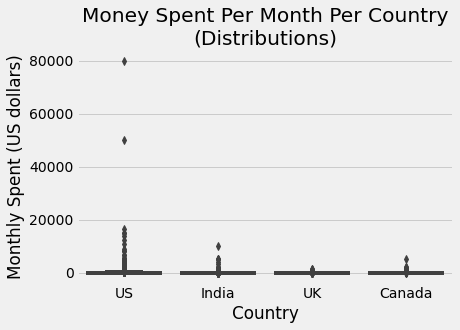

In [248]:
# Generate 4 box plots to examine the distribution of monthly spent as a function of country

import seaborn as sns
plt.style.use('fivethirtyeight')
sns.boxplot(x='CountryLive', y ='MonthlySpent', data=df3)
plt.xlabel('Country')
plt.ylabel('Monthly Spent (US dollars)')
plt.title('Money Spent Per Month Per Country\n(Distributions)')
plt.xticks(range(4), ['US', 'India', 'UK', 'Canada'])
plt.show()

From the graph, we can see extreme outliers for the US, with participants spending around $50,000 or $80,000 per month on learning. Thus, we'll eliminate any values that go over $20,000

In [249]:
df3 = df3[df3["MonthlySpent"] < 20000]

In [250]:
# Recompute the mean values

mean_df3 = df3.groupby(by='CountryLive').mean()
mean_df3["MonthlySpent"]

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: MonthlySpent, dtype: float64

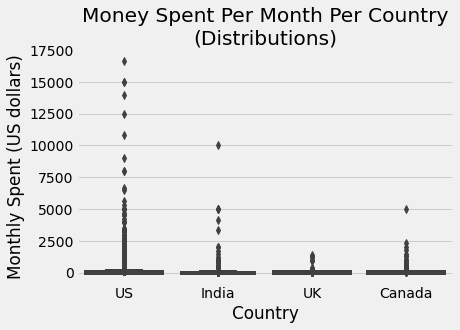

In [251]:
# Re-generate 4 box plots 

plt.style.use('fivethirtyeight')
sns.boxplot(x='CountryLive', y ='MonthlySpent', data=df3)
plt.xlabel('Country')
plt.ylabel('Monthly Spent (US dollars)')
plt.title('Money Spent Per Month Per Country\n(Distributions)')
plt.xticks(range(4), ['US', 'India', 'UK', 'Canada'])
plt.show()

In [252]:
# Inspect the outliers for India

df3_india = df3[(df3["CountryLive"] == 'India') & (df3["MonthlySpent"] >= 2500)]
df3_india 

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpent
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


As it's not clear where the money was spent on in India, it's safer that we remove these outliers.

In [253]:
# Remove outliers for India

df3 = df3.drop(df3_india.index) # drop rows using the row labels

In [254]:
# Inspect the outliers for the US

df3_us = df3[(df3["CountryLive"] == "United States of America") & (df3["MonthlySpent"] >= 6000)]
df3_us 

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpent
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Out of the 11 outliers, there were 6 people who attended a bootcamp, which explained the money spent. However, we're unsure about the other 5 outliers. Thus, we remove these 5 outliers.

In [257]:
df3_us = df3_us[df3_us["BootcampName"].isnull()]
df3 = df3.drop(df3_us.index)

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). Thus, we'll remove respondents that had been programming for three months or less at the time they completed the survey.

In [263]:
df3_us_less_than_3 = df3[(df3["CountryLive"] == "United States of America") & (df3["MonthlySpent"] >= 6000)
                        & (df3['MonthsProgramming'] <= 3)]
df3 = df3.drop(df3_us_less_than_3.index)

In [264]:
# Inspect the extreme outliers for Canada
df3_can = df3[(df3["CountryLive"] == "Canada") & (df3["MonthlySpent"] > 4500)]
df3_can

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpent
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [265]:
# Remove the extreme outliers for Canada
df3 = df3.drop(df3_can.index)

In [266]:
# Recompute the mean values 
df3_mean = df3.groupby(by='CountryLive').mean()
df3_mean["MonthlySpent"]

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MonthlySpent, dtype: float64

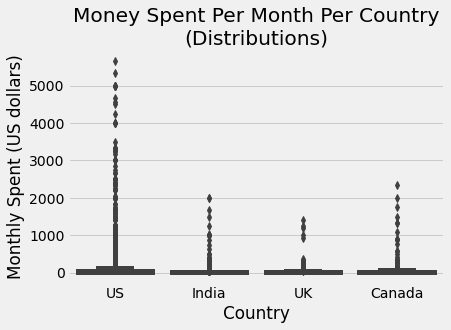

In [267]:
# Regenerate the final box plots
plt.style.use('fivethirtyeight')
sns.boxplot(x='CountryLive', y ='MonthlySpent', data=df3)
plt.xlabel('Country')
plt.ylabel('Monthly Spent (US dollars)')
plt.title('Money Spent Per Month Per Country\n(Distributions)')
plt.xticks(range(4), ['US', 'India', 'UK', 'Canada'])
plt.show()

## Choosing the Two Best Markets

Considering the results we've found so far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay a good amount of money each month. We'll also choose another market to advertise in.

One possible option is Canada, followed by India as in Canada, there are people who can spend up to 93 per month, while in India, the average monthly spent is only $65. 

Let's also take another look at the number of potential customers in each country.

In [268]:
# Frequency table for the CountryLive column

df3["CountryLive"].value_counts(normalize=True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

Based on this, it seems that India might be the 2nd market as:
- There are more potential customers in India then in Canada
- As we sell subscriptions at a price of 59 per month, this doesn't seem like a big expense as Indians spend roughly 65$/month on learning

We also need to take into account the followings points when making the decision:
- There could be many challenges when advertising in more than one country.
- Need to manage the advertising budgets between the two markets appropriately.

At this point,  it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

## Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.